# Alexandra Vucenovic 
# CMP 262
## Project 2

### Web Scraping Data Analysis - scrape 5 pages from a site for html data to analyze/answer questions concerning the data


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lxml. html
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# USWNT Data Scraping


In [71]:
url='https://www.ussoccer.com/uswnt-stats/2023'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [72]:
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html lang="en">
 <head>
  <title data-react-helmet="true">
   2023 USWNT Statistics | U.S. Soccer Official Website
  </title>
  <meta content="2023 USWNT Statistics | U.S. Soccer Official Website" data-react-helmet="true" name="name"/>
  <meta content="https://cdn.ussoccer.com/-/media/project/ussf/migrated/images/crestmeta.ashx?h=1840&amp;la=en-US&amp;w=1840&amp;rev=8e926904ca024904b879b2180bf3ec52&amp;hash=AA931A7856DF3DA77B7135F2360BE25A" data-react-helmet="true" name="image"/>
  <meta content="2023 USWNT Statistics | U.S. Soccer Official Website" data-react-helmet="true" property="og:title"/>
  <meta content="https://cdn.ussoccer.com/-/media/project/ussf/migrated/images/crestmeta.ashx?h=1840&amp;la=en-US&amp;w=1840&amp;rev=8e926904ca024904b879b2180bf3ec52&amp;hash=AA931A7856DF3DA77B7135F2360BE25A" data-react-helmet="true" property="og:image"/>
  <meta content="https://www.ussoccer.com/uswnt-stats/2023" data-react-helmet="true" property="og:url"/>
  <meta content="we

bs4.BeautifulSoup

In [87]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


url = 'https://www.ussoccer.com/uswnt-stats/2023'
response = requests.get(url)
html_content = response.content


soup = BeautifulSoup(html_content, 'html.parser')
stats_table = soup.find('table', {'id': 'some_table_id'})
print(stats_table)
player_list = []

for row in stats_table.find_all('tr'):  
    cells = row.find_all('td')    
    for cell in cells:
        print(cell.text)   
    if len(cells) >= 2:
        name = cells[0].text.strip()
        pos = cells[1].text.strip()       
        player_list.append({'Player Name': name, 'Position': pos})


player_df = pd.DataFrame(player_list)


print(player_df)

# Player name and position is at the bottom of the output in a row 
# Didn't know how to remove the top part of the output and didn't want to mess up the code so please scroll to see it thank you!

<table id="some_table_id">
<tbody>
<tr style="background-color:#202A46; color:white;">
<td style="width: 65px; height: 55px;"><span style="color: #ffffff;"><strong>Name</strong></span></td>
<td style="width: 65px; height: 55px;"><strong><span style="color: #ffffff;">Pos.</span></strong></td>
<td style="width: 65px; height: 55px;"><strong><span style="color: #ffffff;">GP</span></strong></td>
<td style="width: 65px; height: 55px;"><strong><span style="color: #ffffff;">GS</span></strong></td>
<td style="width: 65px; height: 55px;"><strong><span style="color: #ffffff;">Min</span></strong></td>
<td style="width: 65px; height: 55px;"><strong><span style="color: #ffffff;">G</span></strong></td>
<td style="width: 65px; height: 55px;"><strong><span style="color: #ffffff;">A</span></strong></td>
<td style="width: 65px; height: 55px;"><strong><span style="color: #ffffff;">Y</span></strong></td>
<td style="width: 65px; height: 55px;"><strong><span style="color: #ffffff;">R</span></strong></td>
<td

# How many goals were scored in 2023?

In [89]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


url = 'https://www.ussoccer.com/uswnt-stats/2023'
response = requests.get(url)
html_content = response.content


soup = BeautifulSoup(html_content, 'html.parser')
stats_table = soup.find('table', {'id': 'some_table_id'})
player_list = []


for row in stats_table.find_all('tr'):  
    cells = row.find_all('td')    
    if len(cells) >= 11:  
        name = cells[0].text.strip()
        pos = cells[1].text.strip()
        goals = cells[10].text.strip()        
        if goals != 'Goals':          
            player_list.append({'Player Name': name, 'Position': pos, 'Goals': goals})

player_df = pd.DataFrame(player_list)
print(player_df)


try:
    total_goals = player_df['Goals'].astype(int).sum()
    print("Total goals scored:", total_goals)
except ValueError:
    print("Invalid literal for int() with base 10 encountered in 'Goals' column.")
    #kept getting error for int so made a try/except code to ignore the error I was getting 

           Player Name Position Goals
0       Albert, Korbin        M     0
1          Coffey, Sam        M     1
2          Cook, Alana        D     1
3     Dahlkemper, Abby        D     0
4     Davidson, Tierna        D     1
5     DeMelo, Savannah        M     0
6        Dunn, Crystal        D    24
7          Ertz, Julie        M    20
8          Fishel, Mia        F     1
9           Fox, Emily        D     1
10        Girma, Naomi        D     0
11       Hatch, Ashley        F     5
12      Horan, Lindsey        M    31
13       Huerta, Sofia        D     0
14   Kingsbury, Aubrey       GK      
15    Kornieck, Taylor        M     2
16      Krueger, Casey        D     0
17       Lavelle, Rose        M    24
18      Mewis, Kristie        M     7
19        Morgan, Alex        F   121
20    Moultrie, Olivia        D     0
21       Murphy, Casey       GK      
22      Naeher, Alyssa       GK      
23  Nighswonger, Jenna        D     0
24      O'Hara, Kelley        D     3
25     Purce

In [48]:
for i, df in enumerate(table1):
    print(f"Columns of DataFrame {i}: {df.columns}")

Columns of DataFrame 0: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
Columns of DataFrame 1: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


# Which players played the most minutes per their position in 2022? Give their name and position.

In [91]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


url = 'https://www.ussoccer.com/uswnt-stats/2022'
response = requests.get(url)
html_content = response.content


soup = BeautifulSoup(html_content, 'html.parser')
stats_table = soup.find('table', {'id': 'some_table_id'})
player_list = []


for row in stats_table.find_all('tr'):  
    cells = row.find_all('td')
    if len(cells) >= 11: 
        name = cells[0].text.strip()
        pos = cells[1].text.strip()
        minutes_played = cells[4].text.strip()     
        if name != 'TOTAL' and minutes_played != 'Min':           
            player_list.append({'Player Name': name, 'Position': pos, 'Minutes Played': minutes_played})

player_df = pd.DataFrame(player_list)


player_df['Minutes Played'] = pd.to_numeric(player_df['Minutes Played'], errors='coerce')
# had to look up this code in order to find out which player had the most minutes played, kept getting just total minutes played for everyone

most_minutes_player = player_df.loc[player_df['Minutes Played'].idxmax()]


print("Player with the most minutes played in 2022:")
print(most_minutes_player)

Player with the most minutes played in 2022:
Player Name       Cook, Alana
Position                    D
Minutes Played         1286.0
Name: 1, dtype: object


# What year had the most amount of clean sheets? Create a bar graph depicting the amount of clean sheets from 2019-2023.

/var/folders/wq/8f0w9vsx4vl2kmj4s_tcjl4w0000gn/T/ipykernel_47613/4029195214.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year_with_most_shutouts = career_shutouts_df.idxmax()[0]


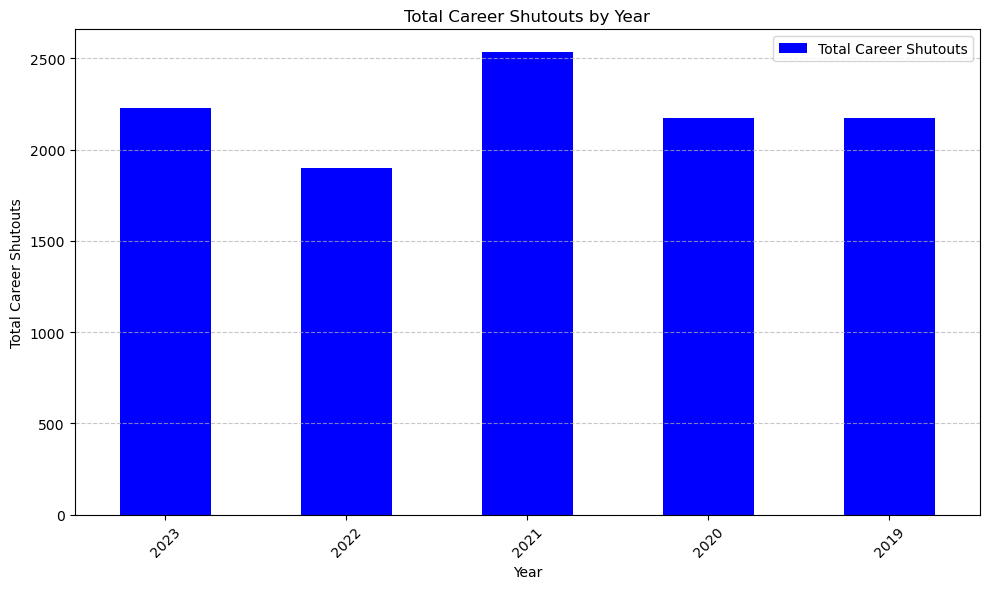

The year with the most career shutouts is 2021 with 2532.0 shutouts.


In [99]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

#list of URLs for each year
urls = [
    'https://www.ussoccer.com/uswnt-stats/2023',
    'https://www.ussoccer.com/uswnt-stats/2022',
    'https://www.ussoccer.com/uswnt-stats/2021',
    'https://www.ussoccer.com/uswnt-stats/2020',
    'https://www.ussoccer.com/uswnt-stats/2019'
]


career_shutouts_data = {}
for url in urls:  
    response = requests.get(url)
    html_content = response.content
    soup = BeautifulSoup(html_content, 'html.parser')  
    stats_table = soup.find('table', {'id': 'some_table_id'})
    
   
    player_data = []
    for row in stats_table.find_all('tr'):
        cells = row.find_all('td')
        if len(cells) >= 11:  
            player_name = cells[0].text.strip()
            career_shutouts = cells[9].text.strip() 
            player_data.append({'Player Name': player_name, 'Career Shutouts': career_shutouts})
    
  
    player_df = pd.DataFrame(player_data)  
    player_df['Career Shutouts'] = pd.to_numeric(player_df['Career Shutouts'], errors='coerce')
    total_career_shutouts = player_df['Career Shutouts'].sum()
    year = int(url.split('/')[-1])
    career_shutouts_data[year] = total_career_shutouts


career_shutouts_df = pd.DataFrame.from_dict(career_shutouts_data, orient='index', columns=['Total Career Shutouts'])


year_with_most_shutouts = career_shutouts_df.idxmax()[0]


career_shutouts_df.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Total Career Shutouts by Year')
plt.xlabel('Year')
plt.ylabel('Total Career Shutouts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"The year with the most career shutouts is {year_with_most_shutouts} with {career_shutouts_df.loc[year_with_most_shutouts]['Total Career Shutouts']} shutouts.")



# How many yellow cards were received in 2023?

In [96]:
import requests
from bs4 import BeautifulSoup


url_2023 = 'https://www.ussoccer.com/uswnt-stats/2023'


response = requests.get(url_2023)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')
stats_table = soup.find('table', {'id': 'some_table_id'})
total_yellow_cards = 0


for row in stats_table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) >= 8:  
        yellow_cards = cells[7].text.strip()  
        if yellow_cards.isdigit():
            total_yellow_cards += int(yellow_cards)


print("Total Yellow Cards in 2023:", total_yellow_cards)

Total Yellow Cards in 2023: 13


# Create a scatter plot showing the number of caps players had in 2019.

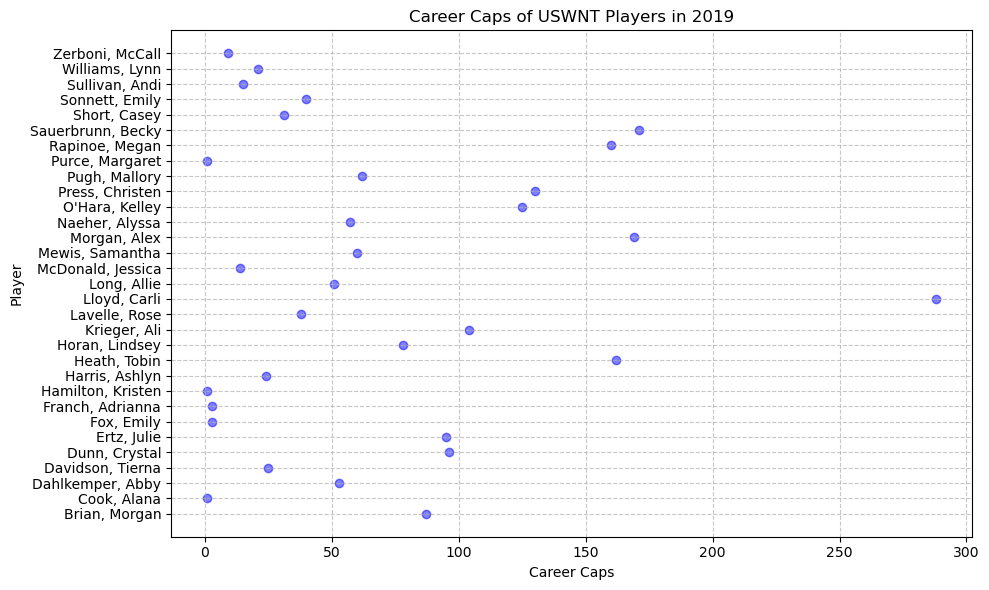

In [97]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


url_2019 = 'https://www.ussoccer.com/uswnt-stats/2019'


response = requests.get(url_2019)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')
stats_table = soup.find('table', {'id': 'some_table_id'})


player_names = []
career_caps = []


for row in stats_table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) >= 10:  
        player_name = cells[0].text.strip()  
        caps = cells[9].text.strip() 
        if caps.isdigit():
            player_names.append(player_name)
            career_caps.append(int(caps))


plt.figure(figsize=(10, 6))
plt.scatter(career_caps, range(len(player_names)), color='blue', alpha=0.5)
plt.title('Career Caps of USWNT Players in 2019')
plt.xlabel('Career Caps')
plt.ylabel('Player')
plt.yticks(range(len(player_names)), player_names)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()